In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL

In [25]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.',untar=True)

228818944/228813984 [==============================] - 75s 0us/step


In [27]:
data_dir

'.\\datasets\\flower_photos'

In [29]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [32]:
images_count = len(list(data_dir.glob('*/*.jpg')))
images_count

3670

In [33]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

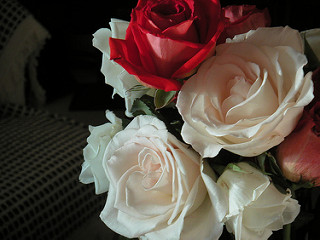

In [36]:
PIL.Image.open(str(roses[1]))

In [43]:
flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [44]:
flower_labels_dict = {
    'roses' : 0,
    'dandelion' : 2,
    'daisy' : 1,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [47]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(240, 179, 3)

In [49]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [56]:
X,y = [],[]
for flower_name,images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,(180,180))
        X.append(resized_image)
        y.append(flower_labels_dict[flower_name])

In [52]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [58]:
X = np.array(X)
y = np.array(y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [62]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [64]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.00392157],
        [0.        , 0.00784314, 0.01568627],
        [0.00392157, 0.01568627, 0.03137255],
        ...,
        [0.        , 0.04705882, 0.07058824],
        [0.        , 0.04313725, 0.06666667],
        [0.        , 0.04705882, 0.0627451 ]],

       [[0.        , 0.00392157, 0.00392157],
        [0.        , 0.00784314, 0.01568627],
        [0.00392157, 0.01568627, 0.03137255],
        ...,
        [0.00392157, 0.05098039, 0.07058824],
        [0.        , 0.04705882, 0.0627451 ],
        [0.00392157, 0.05098039, 0.06666667]],

       [[0.        , 0.00392157, 0.00784314],
        [0.        , 0.01176471, 0.01568627],
        [0.00392157, 0.01568627, 0.03137255],
        ...,
        [0.00392157, 0.05098039, 0.06666667],
        [0.00392157, 0.05490196, 0.06666667],
        [0.00392157, 0.05098039, 0.06666667]],

       ...,

       [[0.        , 0.01568627, 0.03529412],
        [0.00784314, 0.        , 0.00392157],
        [0.        , 0

In [65]:
model_image = models.Sequential([
                    layers.Conv2D(16,3,padding = 'same',activation = 'relu',input_shape = (180,180,3)),
                    layers.MaxPooling2D((2,2)),
                    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Flatten(),
                    layers.Dense(128,activation = 'relu'),
                    layers.Dense(5,activation = 'softmax')])
model_image.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  
model_image.fit(X_train_scaled,y_train,epochs=1)

92/92 [==============================] - 56s 595ms/step - loss: 1.7412 - accuracy: 0.3682


In [66]:
model_image.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 4s 172ms/step - loss: 1.1562 - accuracy: 0.5286


[1.1561580896377563, 0.528610348701477]

In [69]:
y_p = model_image.predict(X_test_scaled)
y_p[0]

array([0.15700996, 0.4159214 , 0.19455004, 0.07816271, 0.15435587],
      dtype=float32)

In [70]:
yp = [np.argmax(element) for element in y_p]
yp[:5]

[1, 0, 1, 4, 2]

In [72]:
y_test[:5]

array([2, 0, 1, 4, 1])

In [79]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
])

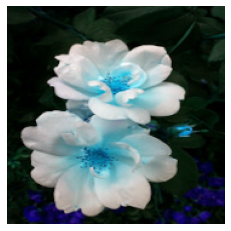

In [75]:
plt.axis('off')
plt.imshow(X[0])

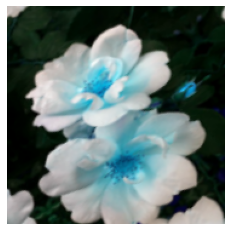

In [81]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [82]:
model_image = models.Sequential([
                    data_augmentation,
                    layers.Conv2D(16,3,padding = 'same',activation = 'relu',input_shape = (180,180,3)),
                    layers.MaxPooling2D((2,2)),
                    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
                    layers.MaxPooling2D((2,2)),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(128,activation = 'relu'),
                    layers.Dense(5,activation = 'softmax')])
model_image.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  
model_image.fit(X_train_scaled,y_train,epochs=1)

92/92 [==============================] - 68s 709ms/step - loss: 2.0451 - accuracy: 0.3144


In [84]:
model_image.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 4s 170ms/step - loss: 1.1853 - accuracy: 0.5041


[1.1852526664733887, 0.5040872097015381]